In [1140]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import scipy.stats as st
%matplotlib inline
%precision 4
plt.style.use('ggplot')

stat = np.mean

In [1141]:
def get_sample(n, p):
    #G = nx.fast_gnp_random_graph(n, p)
    #G = nx.powerlaw_cluster_graph(n, 4, p)
    #G = nx.erdos_renyi_graph(n, p)
    #G = nx.watts_strogatz_graph(n, 10, p)
    #G = nx.random_regular_graph(8, n)
    #G = nx.barabasi_albert_graph(n, 100)
    G = nx.random_geometric_graph(n, p)

    #G = nx.karate_club_graph()
    #G = nx.florentine_families_graph()

    #     nx.draw(G)
    return nx.degree(G).values()
    #return nx.pagerank(G).values()

DescribeResult(nobs=100, minmax=(0, 11), mean=6.2400000000000002, variance=4.669090909090909, skewness=-0.23967995737413902, kurtosis=-0.06430090575236669)


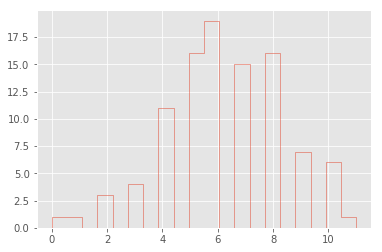

In [1142]:
np.random.seed(1000)
vertex_count = 100

# Probability for edge creation
prob_of_connection = 0.155

# sample that contains degrees of the graph
x = get_sample(vertex_count, prob_of_connection)

print st.describe(x)
plt.hist(x, 20, histtype='step');

6.240328
bias: 0.000328
variance: 0.0450489573117
[ 5.82  6.66]


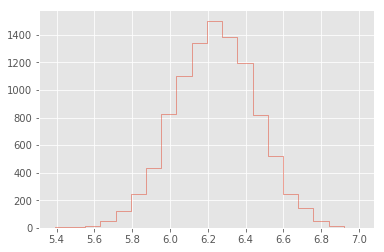

In [1143]:
## bootstrap estimation of statistic "stat"
# numder of bootstrap replications - B
B = 10000

# generate bootstrap replications - xb
xb = np.random.choice(x, (vertex_count, B), replace=True)

# calculate "stat" on each replication - mb
xb_star = stat(xb, axis=0)
xb_star.sort()

# print results mean value of the statistic "stat" and the CI for it
print xb_star.mean()
ci = np.percentile(xb_star, [2.5, 97.5])

plt.hist(xb_star, 20, histtype='step');

bias = xb_star.mean() - stat(x)
variance = sum((xb_star - sum(xb_star)/B)**2)/ (B-1)

print "bias:", bias
print "variance:", variance
print ci


In [1144]:
# check with sampling from the population (random graphs with n nodes and p=0.155)

a = []
count = 0
total_runs = 1000
for i in range(0, total_runs):
    # draw a sample    
    y = get_sample(vertex_count, prob_of_connection)
    
    # calculate value of statistic (stat_value)
    stat_value = stat(y)
    
    # if CI contains stat_value
    if ci[0]<=stat_value and ci[1]>=stat_value :
        count += 1
#     else:
#         print stat_value
    a.append(stat_value)

print 100.0*count / total_runs, "%"

# mean of the sampling distribution
print np.mean(a)


63.1 %
6.52402
